# Main for cutting emg videos

In [1]:
import sys
import shutil

sys.path.append('Documents/DeepProprioception/Vision_Project')
from video_cut_functions import *

### Load project

Load project base on date, name and experiment type (type should be emg in our case).

In [2]:
# Change these variable depending on your project
name = "DP03"
date = "20220802"
exp_type = "emg"

# Load videos paths, experiment info paths, behav paths and stimulus paths (output_paths is for broadcutting which we do not do here.
videos, info, output_paths, behav_paths, stimulus_paths = load_project(name, date, exp_type)

# If you already cut videos you can use these functions to get the paths of the fine cut videos or the stretched videos.
fcut_output_paths = get_output_paths(videos)
output_path_str = get_output_paths(videos, stretch =True)

print("Found the following videos:", videos)
print("Loading the following infos:", info)
print("Loading behav infos:", behav_paths)
print("Loading stimulus infos:", stimulus_paths)

Found the following videos: {'run_1': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_1/20220802_DP03_emg_camera1_run1.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_1/20220802_DP03_emg_camera2_run1.mp4'], 'run_2': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_2/20220802_DP03_emg_camera1_run2.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_2/20220802_DP03_emg_camera2_run2.mp4']}
Loading the following infos: /mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/20220802_DP03_emg_experiment_info.csv
Loading behav infos: ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Tablet/20220802_DP03_emg_run1_response.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Tablet/20220802_DP03_emg_run2_response.csv']
Loading stimulus infos: ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Stimulus/20220802_DP03_emg_run1_stimulus.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Stimulus/20220802_DP03_emg_run2_stimulus.csv']


Duration of : 20220802_DP03_emg_camera1_run1.mp4  :  646.03
Duration of : 20220802_DP03_emg_camera2_run1.mp4  :  646.1
Duration of : 20220802_DP03_emg_camera1_run2.mp4  :  643.4
Duration of : 20220802_DP03_emg_camera2_run2.mp4  :  643.43


<IPython.core.display.Javascript object>


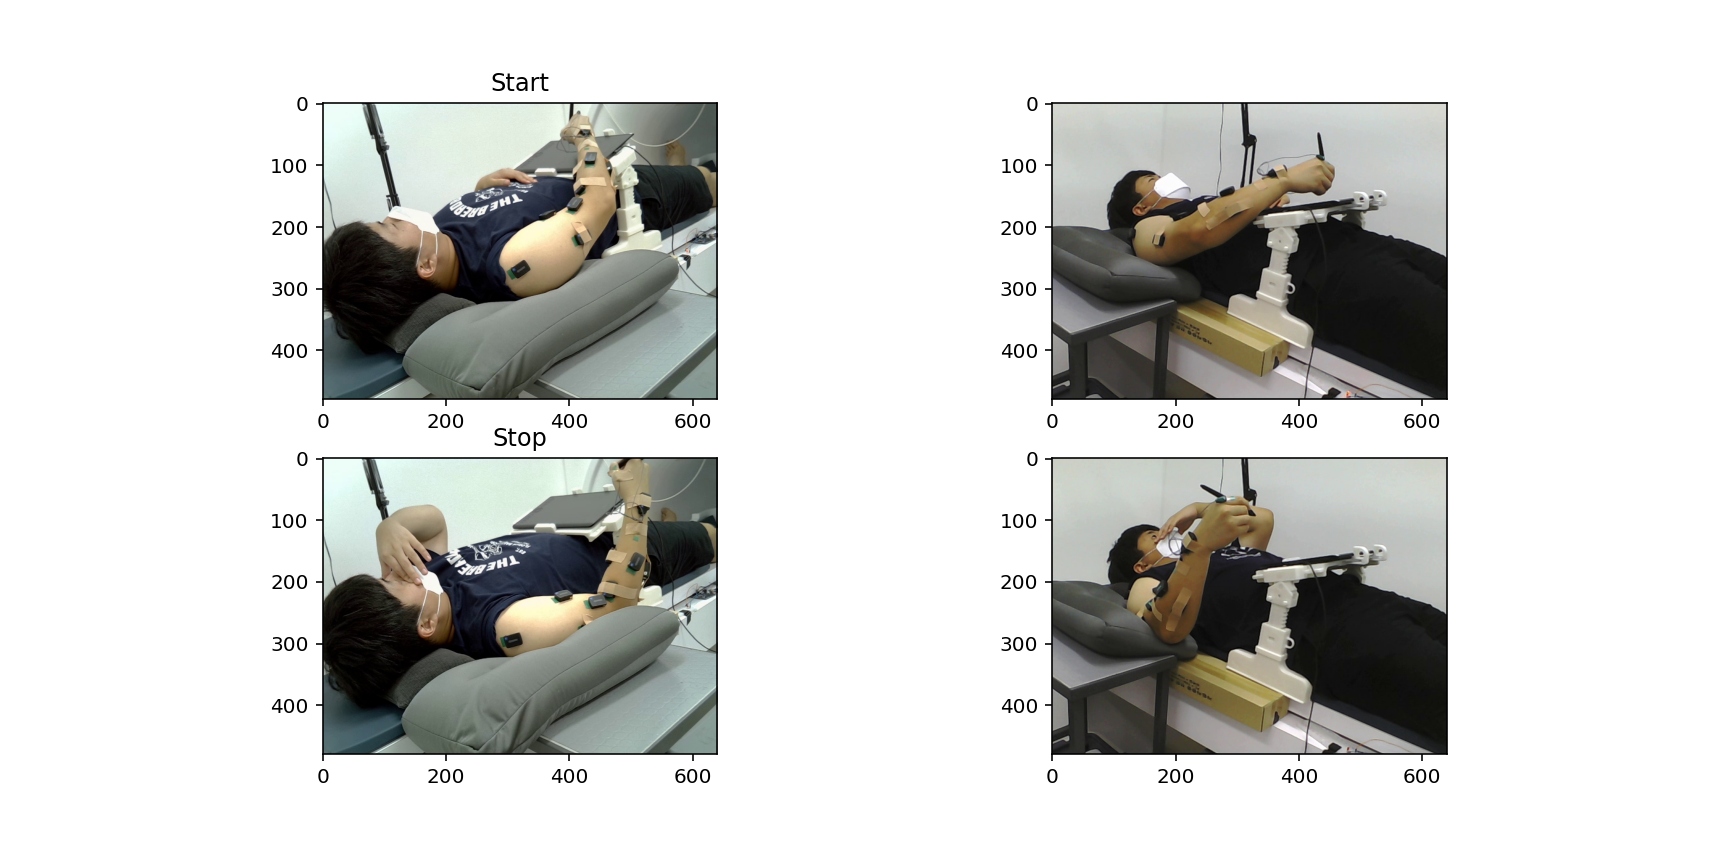

<IPython.core.display.Javascript object>


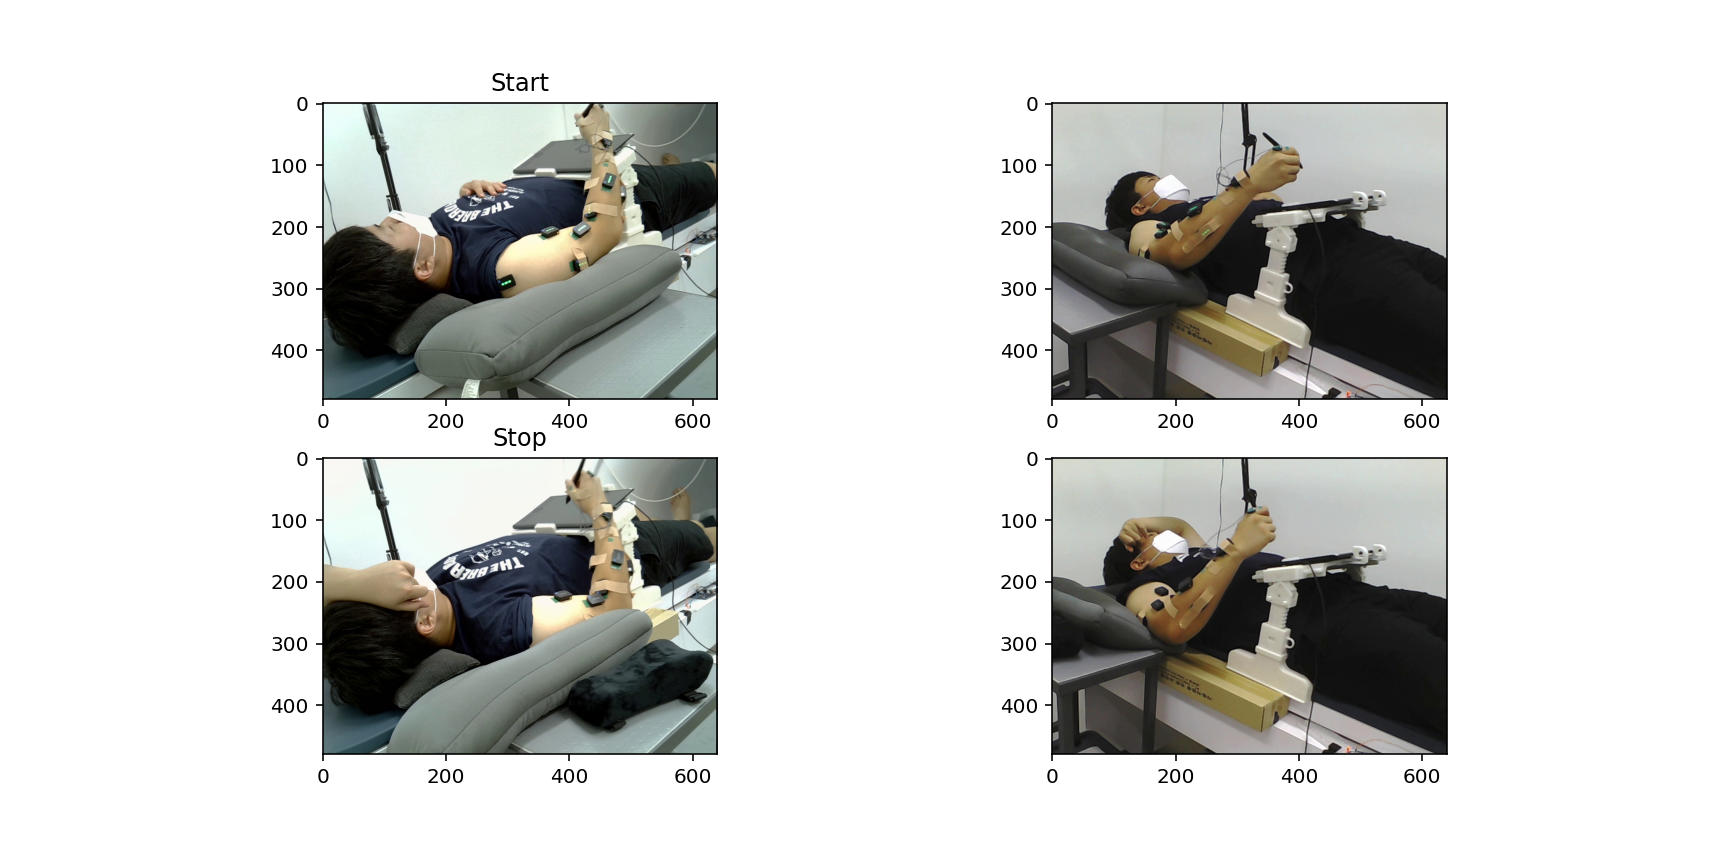

In [9]:
%matplotlib notebook

frames = [3, 643.3]
img_dict = extract_one_frame(videos, frames = frames)
plot_all_frames(img_dict, len(frames), frames = frames)

In [8]:
%matplotlib inline
led_locations = {"run_1": {"start": [[590, 240],[480, 470]], "stop": [[591, 240],[480, 470]]},
                 "run_2":{"start": [[590, 240],[480, 470]], "stop":[[590, 240],[480, 472]]}}
start_list, stop_list = get_startendpoint(videos, led_locations, threshold = 35, radius = 1, window_size = 80, vis = False)
print(start_list, stop_list)

iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_1/20220802_DP03_emg_camera1_run1.mp4


32it [00:00, 1593.85it/s]
2366it [00:01, 1523.10it/s]


iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_1/20220802_DP03_emg_camera2_run1.mp4


32it [00:00, 1532.76it/s]
2366it [00:01, 1315.52it/s]


iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_2/20220802_DP03_emg_camera1_run2.mp4


32it [00:00, 1610.41it/s]
2367it [00:01, 1316.71it/s]


iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP03_emg/Camera_2/20220802_DP03_emg_camera2_run2.mp4


31it [00:00, 1536.65it/s]
2367it [00:01, 1364.23it/s]

{'run_1': [32, 32], 'run_2': [32, 31]} {'run_1': [19346, 19349], 'run_2': [19269, 19269]}


In [5]:
fcut_output_paths = get_output_paths(videos)
print(fcut_output_paths)
cut_all_videos(videos, start_list, stop_list, fcut_output_paths, frame = True)

{'run_1': ['/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_1/fcut/20220721_JW_emg_camera1_run1_fcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_2/fcut/20220721_JW_emg_camera2_run1_fcut.mp4'], 'run_2': ['/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_1/fcut/20220721_JW_emg_camera1_run2_fcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_2/fcut/20220721_JW_emg_camera2_run2_fcut.mp4']}


In [3]:
# fcut_videos = fcut_output_paths
output_path_str = get_output_paths(videos, stretch =True)
print(output_path_str)
# stretch_videos(fcut_videos, info, output_path_str, exp_type = "emg")

{'run_1': ['/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_1/str/20220721_JW_emg_camera1_run1_str.mp4', '/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_2/str/20220721_JW_emg_camera2_run1_str.mp4'], 'run_2': ['/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_1/str/20220721_JW_emg_camera1_run2_str.mp4', '/mnt/sdb2/DeepDraw/Projects/20220721_JW_emg/Camera_2/str/20220721_JW_emg_camera2_run2_str.mp4']}


### Stimulus cut 

In order to compute trajectory separately we need to cut the videos per trajectories. Know that we should train DLC models using fcut videos and use the pretrained model to analyze each trajectories separately. (Training on long videos is more adapted for labeling).

In [4]:
stretch_videos_paths = output_path_str
stimulus_cut(stretch_videos_paths,behav_paths, stimulus_paths, behav_cut= True, watcom = True)
print('Its done')

100%|██████████| 155/155 [03:02<00:00,  1.18s/it]


Finished camera 1 run 1


100%|██████████| 155/155 [03:05<00:00,  1.20s/it]


Finished camera 2 run 1


100%|██████████| 155/155 [03:48<00:00,  1.47s/it]


Finished camera 1 run 2


100%|██████████| 155/155 [03:51<00:00,  1.49s/it]

Finished camera 2 run 2
Its done
